In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPool2D
from tensorflow.random import set_seed
from tensorflow.keras.datasets.mnist import load_data
from sklearn.model_selection import train_test_split

In [3]:
(X_train, y_train) , (X_test, y_test) = load_data()
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=.25, random_state=42)

X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255

11501568/11490434 [==============================] - 0s 0us/step


In [4]:
def plot_accuracy(result):
  plt.figure(figsize=(12,5))
  plt.plot(result.history["accuracy"], "r")
  plt.plot(result.history["val_accuracy"], "b")
  plt.legend(["accuracy","val_accuracy"])
  plt.show()

In [5]:
from tensorflow.keras.callbacks import EarlyStopping

es = EarlyStopping(patience=5, min_delta=0.01, verbose=1)

set_seed(0)
model = Sequential()
model.add( Flatten(input_shape=(28,28)) )
model.add( Dense(128, activation="relu") )
model.add( Dense(10, activation="softmax") )

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])

result = model.fit(X_train, y_train, epochs=100, callbacks=[es], validation_data=(X_val, y_val) )


Epoch 1/100
1407/1407 [==============================] - 8s 3ms/step - loss: 0.2823 - accuracy: 0.9209 - val_loss: 0.1765 - val_accuracy: 0.9489
Epoch 2/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.1324 - accuracy: 0.9613 - val_loss: 0.1310 - val_accuracy: 0.9629
Epoch 3/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0946 - accuracy: 0.9720 - val_loss: 0.1241 - val_accuracy: 0.9656
Epoch 4/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0755 - accuracy: 0.9778 - val_loss: 0.1046 - val_accuracy: 0.9709
Epoch 5/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0617 - accuracy: 0.9819 - val_loss: 0.0962 - val_accuracy: 0.9732
Epoch 6/100
1407/1407 [==============================] - 4s 3ms/step - loss: 0.0522 - accuracy: 0.9851 - val_loss: 0.1090 - val_accuracy: 0.9716
Epoch 7/100
1407/1407 [==============================] - 5s 3ms/step - loss: 0.0438 - accuracy: 0.9879 - val_loss: 0.1040 - val_ac

In [7]:
model.evaluate(X_test, y_test, verbose=0)

[0.08935488760471344, 0.9781000018119812]

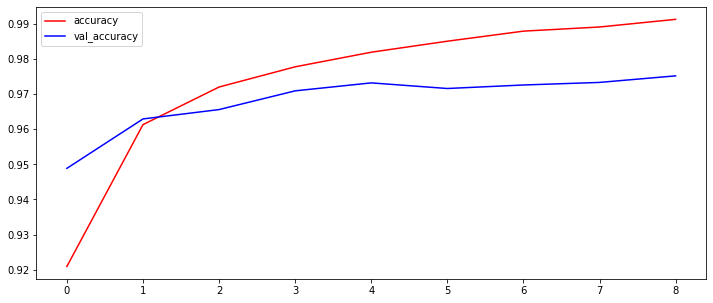

In [8]:
plot_accuracy(result)

In [9]:
# budowa sieci CNN

set_seed(0)
model = Sequential()

# konwersja danych wejsciowych do macierzy 4-wymiarowych
X_train_cnn = X_train.reshape( len(X_train), 28, 28, 1 )
X_val_cnn = X_val.reshape( len(X_val), 28, 28, 1 )
X_test_cnn = X_test.reshape( len(X_test), 28, 28, 1 )

model.add( Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2)) )

model.add( Dropout(0.1) )

model.add( Flatten() )
model.add( Dense(128, activation="relu") )
model.add( Dense(10, activation="softmax") )

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
es = EarlyStopping(patience=5, min_delta=0.005)
result = model.fit(X_train_cnn, y_train, epochs=100, callbacks=[es], validation_data=(X_val_cnn, y_val))

Epoch 1/100
1407/1407 [==============================] - 16s 4ms/step - loss: 0.1598 - accuracy: 0.9523 - val_loss: 0.0692 - val_accuracy: 0.9804
Epoch 2/100
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0585 - accuracy: 0.9826 - val_loss: 0.0614 - val_accuracy: 0.9823
Epoch 3/100
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0400 - accuracy: 0.9879 - val_loss: 0.0541 - val_accuracy: 0.9858
Epoch 4/100
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0299 - accuracy: 0.9910 - val_loss: 0.0576 - val_accuracy: 0.9852
Epoch 5/100
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0235 - accuracy: 0.9930 - val_loss: 0.0553 - val_accuracy: 0.9860
Epoch 6/100
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0181 - accuracy: 0.9955 - val_loss: 0.0615 - val_accuracy: 0.9855
Epoch 7/100
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0144 - accuracy: 0.9960 - val_loss: 0.0671 - val_a

In [10]:
model.evaluate(X_test_cnn, y_test, verbose=0)

[0.06842535734176636, 0.9836000204086304]

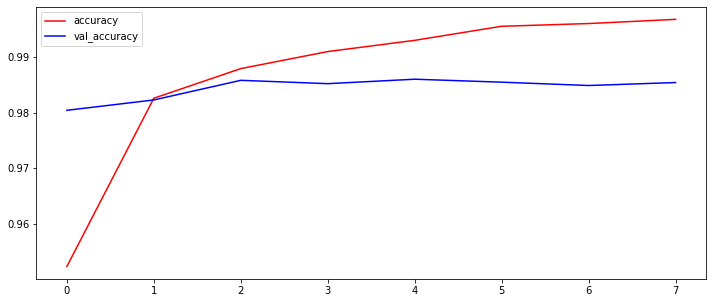

In [11]:
plot_accuracy(result)

Epoch 1/100
1407/1407 [==============================] - 8s 5ms/step - loss: 0.1412 - accuracy: 0.9564 - val_loss: 0.0481 - val_accuracy: 0.9857
Epoch 2/100
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0499 - accuracy: 0.9846 - val_loss: 0.0450 - val_accuracy: 0.9881
Epoch 3/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0386 - accuracy: 0.9885 - val_loss: 0.0455 - val_accuracy: 0.9884
Epoch 4/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0322 - accuracy: 0.9902 - val_loss: 0.0391 - val_accuracy: 0.9895
Epoch 5/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0296 - accuracy: 0.9918 - val_loss: 0.0373 - val_accuracy: 0.9894
Epoch 6/100
1407/1407 [==============================] - 7s 5ms/step - loss: 0.0259 - accuracy: 0.9924 - val_loss: 0.0383 - val_accuracy: 0.9895
Epoch 7/100
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0237 - accuracy: 0.9934 - val_loss: 0.0363 - val_ac

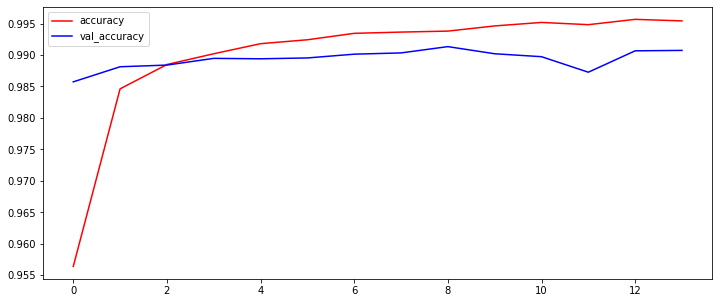

In [12]:
# budowa sieci CNN v2

set_seed(0)
model = Sequential()

# konwersja danych wejsciowych do macierzy 4-wymiarowych
X_train_cnn = X_train.reshape( len(X_train), 28, 28, 1 )
X_val_cnn = X_val.reshape( len(X_val), 28, 28, 1 )
X_test_cnn = X_test.reshape( len(X_test), 28, 28, 1 )

model.add( Conv2D(64, kernel_size=(3,3), input_shape=(28,28,1), activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2)) )
model.add( Dropout(0.2) )

model.add( Conv2D(128, kernel_size=(3,3), input_shape=(28,28,1), activation="relu" ) )
model.add( MaxPool2D(pool_size=(2,2)) )
model.add( Dropout(0.2) )

model.add( Flatten() )
model.add( Dense(128, activation="relu") )
model.add( Dense(10, activation="softmax") )

model.compile(loss="sparse_categorical_crossentropy", metrics=["accuracy"])
es = EarlyStopping(patience=5, min_delta=0.005)
result = model.fit(X_train_cnn, y_train, epochs=100, callbacks=[es], validation_data=(X_val_cnn, y_val))

print(model.evaluate(X_test_cnn, y_test, verbose=0))
plot_accuracy(result)

In [13]:
model.save("cnn-digits-20220611-v2.h5")

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 64)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 13, 13, 64)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 128)        0         
 2D)                                                             
                                                                 
 dropout_2 (Dropout)         (None, 5, 5, 128)        

In [15]:
from keras.utils.vis_utils import plot_model

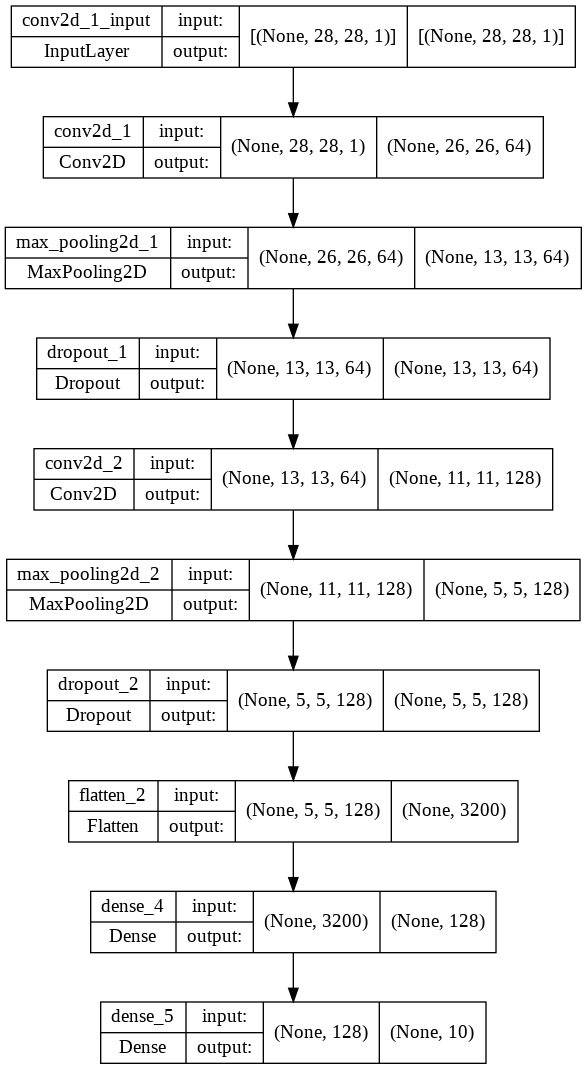

In [16]:
plot_model(model, show_shapes=True)

In [68]:
IMG_INDEX = 1889
y_test[IMG_INDEX]

3

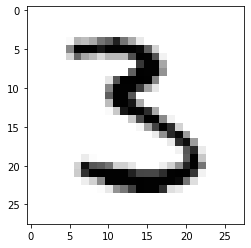

In [69]:
plt.imshow(X_test[IMG_INDEX], "gray_r")

In [70]:
np.argmax( model.predict(X_test[IMG_INDEX].reshape(1,28,28,1)) )

3

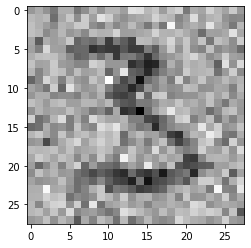

In [71]:
np.random.seed(42)
tmp = X_test[IMG_INDEX] + np.random.normal(0, 0.3, (28,28) )
plt.imshow(tmp, "gray_r")

In [72]:
np.argmax( model.predict(tmp.reshape(1,28,28,1)) )

3

In [73]:
from scipy.ndimage.interpolation import rotate

def crop_center(img, cropx, cropy):
  x, y = img.shape
  startx = x//2 - cropx//2
  starty = y//2 - cropy//2
  return img[ startx:startx+cropx, starty:starty+cropy ]

In [ ]:
tmp = crop_center( rotate(X_test[IMG_INDEX], angle=30) , 28, 28)
plt.imshow(tmp, "gray_r")

In [77]:
np.argmax( model.predict(tmp.reshape(1,28,28,1)) )

3